In [1]:
import numpy as np  # Data manipulation
import pandas as pd # Dataframe manipulation 
import matplotlib.pyplot as plt # Plotting the data and the results
import matplotlib.image as mpimg # For displaying imagees
%matplotlib inline
from keras import models
from keras import layers
import keras.preprocessing  as kp
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras import optimizers

In [2]:
train_datagen = ImageDataGenerator( # Data Augumentation for test data
rescale=1./255,
rotation_range=30,
shear_range=0.3,
zoom_range=0.3
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
train_gen=train_datagen.flow_from_directory('/Users/kethanpabbi/Downloads/Dataset/Train',
                                            target_size=(250,250),
                                            batch_size=48,
                                            class_mode='binary')

Found 160000 images belonging to 2 classes.


In [4]:
valid_gen=test_datagen.flow_from_directory('/Users/kethanpabbi/Downloads/Dataset/Validation',
                                           target_size=(250,250),
                                           batch_size=48,
                                           class_mode='binary')

Found 22598 images belonging to 2 classes.


In [5]:
kernel_s=(3,3)

In [6]:
model=models.Sequential()
model.add(layers.Conv2D(32,kernel_s,activation='relu',input_shape=(250,250,3),
                        kernel_regularizer=regularizers.l2(0.001),padding="VALID"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 64)       0

2022-06-21 11:41:26.931354: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [8]:
history=model.fit(train_gen,steps_per_epoch=70,epochs=30,
                  validation_data=valid_gen,validation_steps=50)

Epoch 1/30
70/70 [==============================] - 136s 2s/step - loss: 0.7552 - acc: 0.5839 - val_loss: 0.6617 - val_acc: 0.6263
Epoch 2/30
70/70 [==============================] - 134s 2s/step - loss: 0.6307 - acc: 0.6479 - val_loss: 0.5298 - val_acc: 0.7404
Epoch 3/30
70/70 [==============================] - 132s 2s/step - loss: 0.5160 - acc: 0.7521 - val_loss: 0.4524 - val_acc: 0.7896
Epoch 4/30
70/70 [==============================] - 131s 2s/step - loss: 0.4133 - acc: 0.8143 - val_loss: 0.2975 - val_acc: 0.8800
Epoch 5/30
70/70 [==============================] - 130s 2s/step - loss: 0.3684 - acc: 0.8372 - val_loss: 0.3067 - val_acc: 0.8612
Epoch 6/30
70/70 [==============================] - 130s 2s/step - loss: 0.3180 - acc: 0.8670 - val_loss: 0.2314 - val_acc: 0.9117
Epoch 7/30
70/70 [==============================] - 133s 2s/step - loss: 0.3111 - acc: 0.8664 - val_loss: 0.3957 - val_acc: 0.8225
Epoch 8/30
70/70 [==============================] - 130s 2s/step - loss: 0.2841 - a

In [9]:
model.save("weights.h5")

<Figure size 432x288 with 0 Axes>

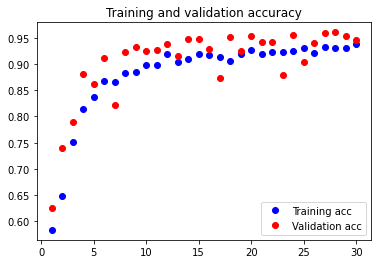

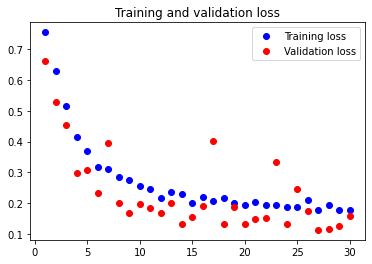

<Figure size 432x288 with 0 Axes>

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'ro', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()